In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

In [2]:
# Create a list of tensors, where each tensor is an MNIST image
image_tensors = []
for image, label in train_data:
    image_crushed = image.view(image.size(0), -1)
    correct_label = torch.zeros(1,10)
    correct_label[0][label] = 1
    resized_label = torch.cat([image_crushed,correct_label], dim=1)
    image_tensors.append(resized_label)

mnist_tensor = torch.stack(image_tensors, dim=1)
print(mnist_tensor.shape)

torch.Size([1, 60000, 794])


torch.Size([794, 60000])
tensor(5)


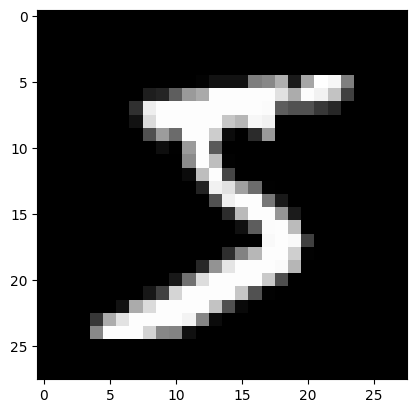

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

X = mnist_tensor.view(60000, 794).float().T
print(X.size())
first_value = X[:,0] 
plt.imshow(first_value[0:784].view(28, 28), cmap='gray')

index_label = torch.argmax(first_value[784:794])
print(index_label)

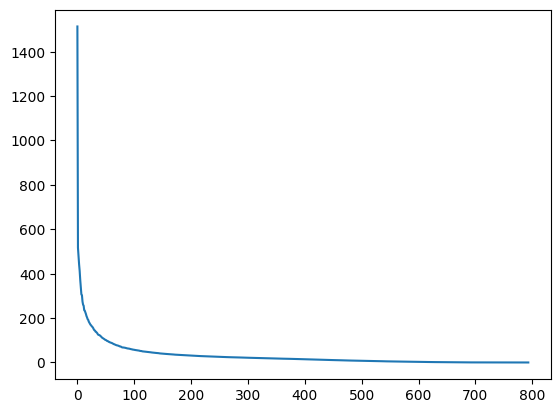

In [4]:
U, S, V = torch.svd(X)
plt.plot(S)

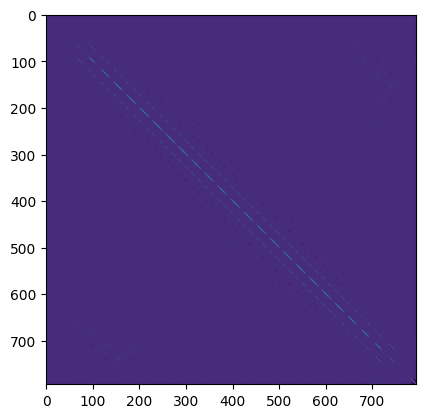

In [5]:
strangeI = U[:, :200] @ U[:, :200].T
plt.imshow(strangeI)

torch.Size([794, 60000])


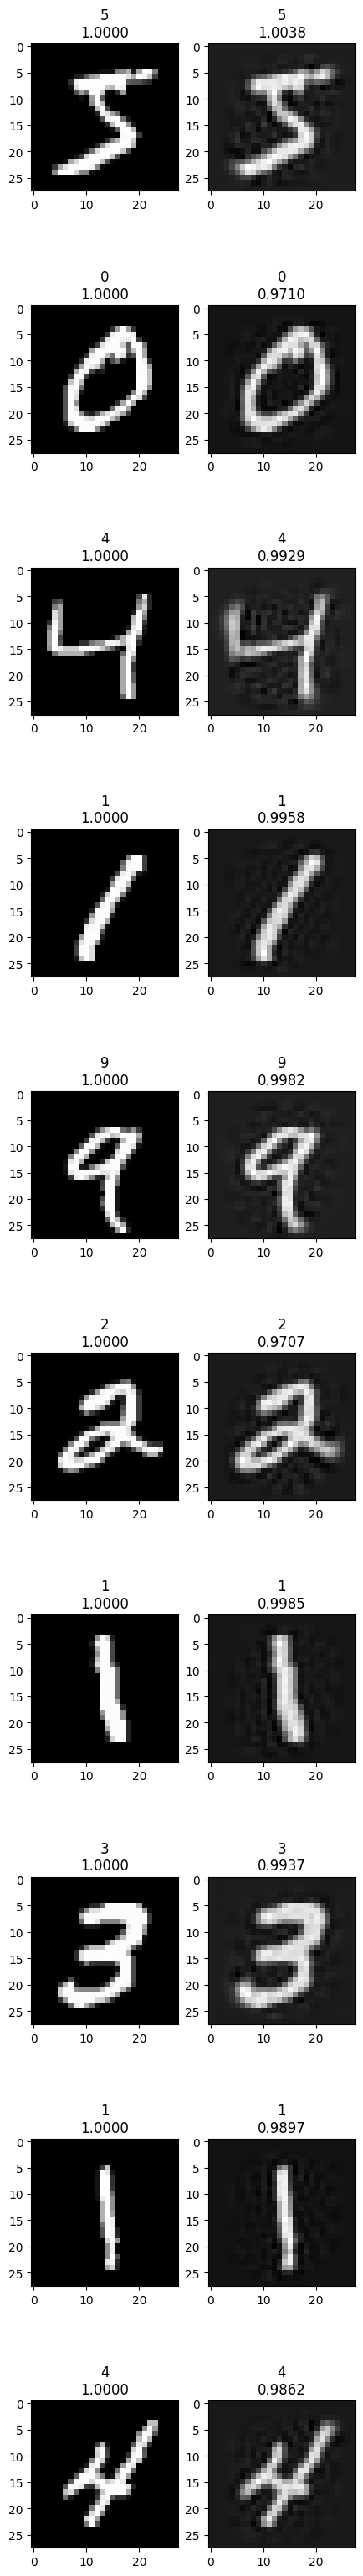

In [6]:
_, ax = plt.subplots(10, 2, figsize=(5, 40))
print(X.size())
XHat = strangeI @ X
#XHat = U @ U.T @ X
for i in range(10):
    X_image = X[:,i][0:784]
    XHat_image = XHat[:,i][0:784] 
    
    X_labels = X[:,i][784:794]
    XHat_labels = XHat[:,i][784:794]
    
    X_guess = torch.argmax(X[:,i][784:794]).item()
    XHat_guess = torch.argmax(XHat[:,i][784:794]).item()
    
    ax[i, 0].imshow(X_image.view(28, 28), cmap='gray')
    ax[i, 0].set_title('{}\n{:.4f}'
                .format(X_guess,X_labels[X_guess].item()))
    
    ax[i, 1].imshow(XHat_image.view(28, 28), cmap='gray')
    ax[i, 1].set_title('{}\n{:.4f}'
                .format(XHat_guess,XHat_labels[XHat_guess].item()))

In [7]:
# Create training and test dataloaders

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 100

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [8]:
import torch.nn as nn
import torch
# define the NN architecture
class SimpleModelCase1(nn.Module):
    def __init__(self, initialU1, initialU2, initialV):
        super(SimpleModelCase1, self).__init__()
        self.U1 = nn.Parameter(torch.clone(initialU1), requires_grad = True)
        self.U2 = nn.Parameter(torch.clone(initialU2), requires_grad = True)
        self.V = nn.Parameter(torch.clone(initialV), requires_grad= True)
        
    def forward(self, x):
        factor1 = self.U1 @ self.V @ x.T
        factor2 = self.U2 @ self.V @ x.T
        
        out = torch.mul(factor1, factor2)
        return out.T
        # out = x @ self.W.T
        # return out
    
class SimpleModelCase2(nn.Module):
    def __init__(self, initialW1, initialW2):
        super(SimpleModelCase2, self).__init__()
        self.W1 = nn.Parameter(torch.clone(initialW1), requires_grad = True)
        self.W2 = nn.Parameter(torch.clone(initialW2), requires_grad = True)
        
    def forward(self, x):
        factor1 = self.W1 @ x.T
        factor2 = self.W2 @ x.T
        out = torch.mul(factor1, factor2)
        return out.T
        # out = x @ self.W.T
        # return out

# initialize the NN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model1 = SimpleModelCase1(U[:, :200], U[:, :200], U[:, :200].T)
model1.to(device)

W = U[:, :200] @ U[:, :200].T
model2 = SimpleModelCase2(W, W)
model2.to(device)



SimpleModelCase2()

In [13]:
import torch.nn as nn
import torch
# define the NN architecture
class SimpleModelCase1(nn.Module):
    def __init__(self, initialU1, initialU2, initialV):
        super(SimpleModelCase1, self).__init__()
        self.U1 = nn.Parameter(torch.clone(initialU1), requires_grad = True)
        self.U2 = nn.Parameter(torch.clone(initialU2), requires_grad = True)
        self.V = nn.Parameter(torch.clone(initialV), requires_grad= True)

    def forward(self, x):
        factor1 = self.U1 @ self.V @ x.T
        factor2 = self.U2 @ self.V @ x.T

        out = torch.mul(factor1, factor2)
        return out.T
        # out = x @ self.W.T
        # return out

class SimpleModelCase2(nn.Module):
    def __init__(self, initialW1, initialW2):
        super(SimpleModelCase2, self).__init__()
        self.W1 = nn.Parameter(torch.clone(initialW1), requires_grad = True)
        self.W2 = nn.Parameter(torch.clone(initialW2), requires_grad = True)

    def forward(self, x):
        factor1 = self.W1 @ x.T
        factor2 = self.W2 @ x.T

        out = torch.mul(factor1, factor2)
        return out.T
        # out = x @ self.W.T
        # return out

class LinearModel(nn.Module):
    def __init__(self, initialU1, initialU2, initialV):
        super(LinearModel, self).__init__()
        self.U1 = nn.Parameter(torch.clone(initialU1), requires_grad = True)
        self.U2 = nn.Parameter(torch.clone(initialU2), requires_grad = True)
        self.V = nn.Parameter(torch.clone(initialV), requires_grad= True)

    def forward(self, x):
        factor1 = self.U1 @ self.V @ x.T
        factor2 = self.U2 @ self.V @ x.T

        out = torch.mul(factor1, factor2)
        return factor1.T
        # out = x @ self.W.T
        # return out

# initialize the NN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model1 = SimpleModelCase1(U[:, :200], U[:, :200], U[:, :200].T)
model1.to(device)

W = U[:, :200] @ U[:, :200].T
model2 = SimpleModelCase2(W, W)
model2.to(device)

model3 = LinearModel(U[:, :200], U[:, :200], U[:, :200].T)
model3.to(device)


LinearModel()

torch.Size([60000, 794])


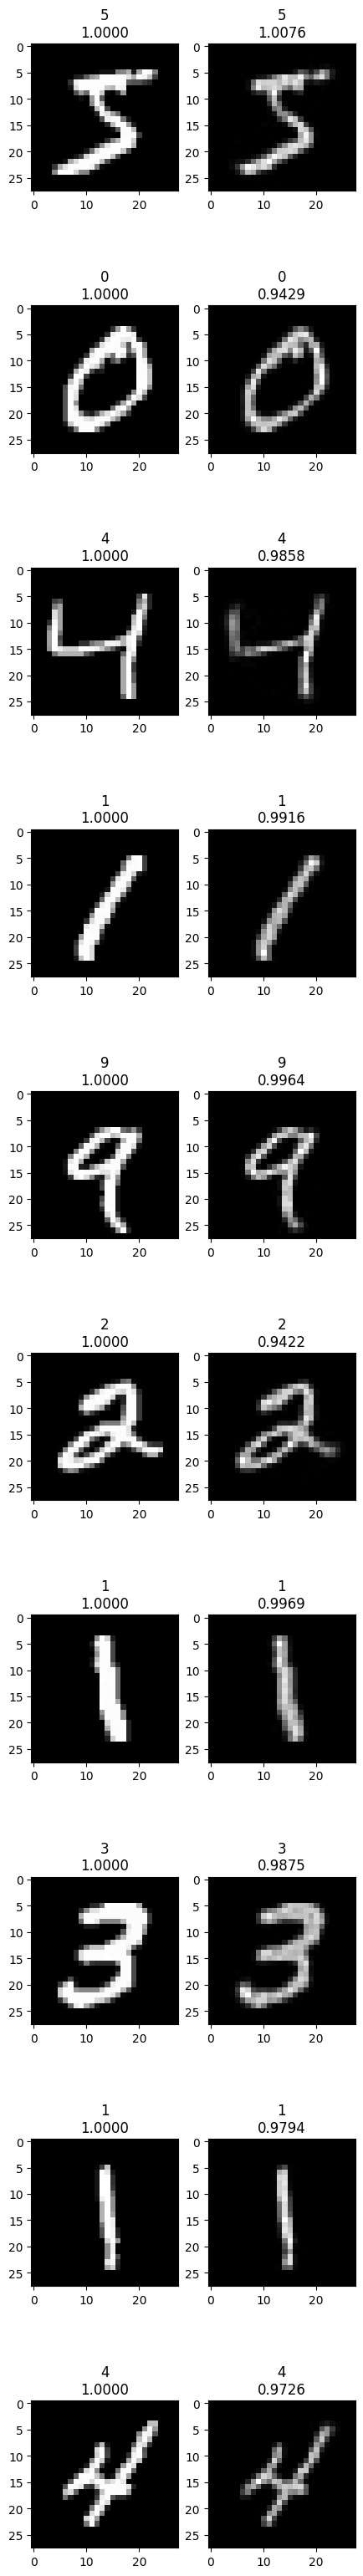

In [14]:
_, ax = plt.subplots(10, 2, figsize=(5, 40))
inputs = mnist_tensor.view(60000, 794).float()
XHat = model1(inputs.to(device))
XHat = XHat.cpu().detach()
print(XHat.size())
for i in range(10):
    
    X_image = X[:,i][0:784]
    XHat_image = XHat[i][0:784] 
    
    X_labels = X[:,i][784:794]
    XHat_labels = XHat[i][784:794]
    
    X_guess = torch.argmax(X_labels).item()
    XHat_guess = torch.argmax(XHat_labels).item()
    
    ax[i, 0].imshow(X_image.view(28, 28), cmap='gray')
    ax[i, 0].set_title('{}\n{:.4f}'
                .format(X_guess,X_labels[X_guess].item()))
    
    ax[i, 1].imshow(XHat_image.view(28, 28), cmap='gray')
    ax[i, 1].set_title('{}\n{:.4f}'
                .format(XHat_guess,XHat_labels[XHat_guess].item()))

torch.Size([60000, 794])


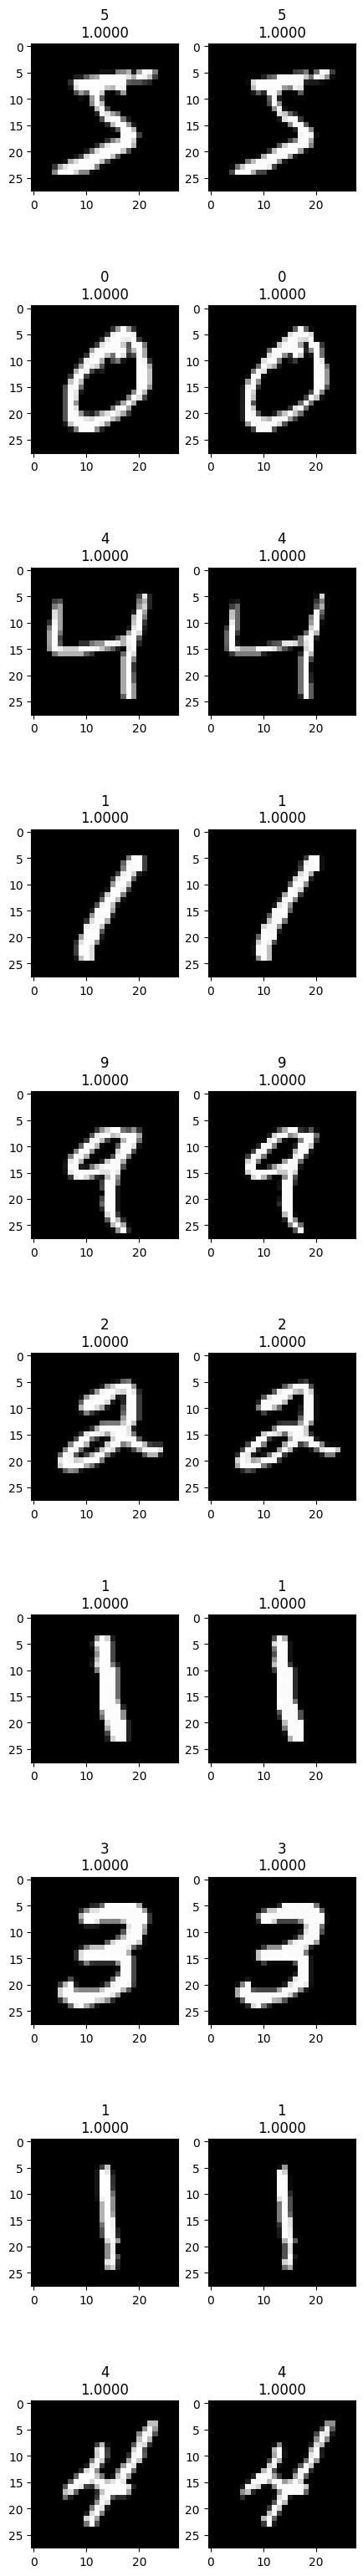

In [15]:
model_test = SimpleModelCase1(U, U, U.T)
model_test.to(device)

_, ax = plt.subplots(10, 2, figsize=(5, 40))
inputs = mnist_tensor.view(60000, 794).float()
XHat = model_test(inputs.to(device))
XHat = XHat.cpu().detach()
print(XHat.size())
for i in range(10):
    
    X_image = X[:,i][0:784]
    XHat_image = XHat[i][0:784] 
    
    X_labels = X[:,i][784:794]
    XHat_labels = XHat[i][784:794]
    
    X_guess = torch.argmax(X_labels).item()
    XHat_guess = torch.argmax(XHat_labels).item()
    
    ax[i, 0].imshow(X_image.view(28, 28), cmap='gray')
    ax[i, 0].set_title('{}\n{:.4f}'
                .format(X_guess,X_labels[X_guess].item()))
    
    ax[i, 1].imshow(XHat_image.view(28, 28), cmap='gray')
    ax[i, 1].set_title('{}\n{:.4f}'
                .format(XHat_guess,XHat_labels[XHat_guess].item()))

In [16]:
#model = model1
model = model1

# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [17]:
import random

x = np.repeat(0.1,10*batch_size)
base_probability = torch.from_numpy(x)
base_probability = base_probability.resize(batch_size,10)

size = 28

max_loops = 10
epochs_per_loop = 20
n_epochs = max_loops * epochs_per_loop


model.to(device)
losses = []
average = []
for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    loops = (epoch-1)//epochs_per_loop+1
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001/loops)

    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        images, labels = data
        # flatten images
        images = images.view(images.size(0), -1)
        input_images = torch.clone(images)
        random_float = random.random()
        noise = [random_float, 1-random_float]
        mask = np.random.choice([True, False], size=images.size(), replace=True, p = noise)
        mask_tensor = torch.tensor(mask, dtype=torch.float32)
        # Invert the values based on the mask
        # Apply the mask and perform the subtraction
        tensor = images * (1 - mask_tensor) + mask_tensor * (1 - images)
        base_guess = torch.full((batch_size,10), 0.1)
        s = torch.sum(mask_tensor, dim=1)
        for i in range(batch_size):
            base_guess[i, labels[i]] = 0.1 + 0.9 * s[i] / (size**2)
        
        correct_label = torch.zeros(batch_size,10)
        for j, value in enumerate(labels):
          index = value.item()
          correct_label[j][index] = 1
        resized_input = torch.cat((tensor, base_guess), dim=1)
        resized_label = torch.cat([images,correct_label], dim=1)

        resized_input = resized_input.to(torch.float32).to(device)
        resized_label = resized_label.to(torch.float32).to(device)

        resized_input.to(device)
        resized_label.to(device)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = resized_input
        total_loss = 0
        for i in range(loops):
          outputs = model(outputs)
        # calculate the loss
          loss = criterion(outputs, resized_label)
          total_loss+=loss * (i+1)

        # backward pass: compute gradient of the loss with respect to model parameters
        total_loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        losses.append(total_loss.cpu().detach().numpy())
        # update running training loss
        train_loss += loss.item()*images.size(0)

    # print avg training statistics
    train_loss = train_loss/len(train_loader)
    average.append(train_loss)
    print('Epoch: {} \t Average Training Loss: {:.6f}'.format(
        epoch,
        train_loss
        ))

C:\Users\redst\PycharmProjects\initial-test\venv\lib\site-packages\torch\_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Epoch: 1 	 Average Training Loss: 6.589315
Epoch: 2 	 Average Training Loss: 5.955826
Epoch: 3 	 Average Training Loss: 5.840118
Epoch: 4 	 Average Training Loss: 5.657181
Epoch: 5 	 Average Training Loss: 5.672194
Epoch: 6 	 Average Training Loss: 5.665325
Epoch: 7 	 Average Training Loss: 5.432884


KeyboardInterrupt: 

In [ ]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)

In [ ]:
noise = [0.05, 0.95]
dataiter = iter(test_loader)
images, labels = next(dataiter)

input_images = images.view(images.size(0), -1)
mask = np.random.choice([True, False], size=input_images.size(), replace=True, p = noise)
mask_tensor = torch.tensor(mask, dtype=torch.float32)
        # Invert the values based on the mask
        # Apply the mask and perform the subtraction
tensor = input_images * (1 - mask_tensor) + mask_tensor * (1 - input_images)
base_guess = torch.full((batch_size,10), 0.1)
s = torch.sum(mask_tensor, dim=1)
for i in range(batch_size):
    print(0.1 + 0.9 * s[i] / (size**2))
    base_guess[i, labels[i]] = 0.1 + 0.9 * s[i] / (size**2)
        
zeros = torch.zeros(batch_size,10)
resized_input = torch.cat((tensor, base_guess), dim=1)
resized_input = resized_input.to(torch.float32).to(device)

# get sample outputs
output = resized_input
loops = 20
for i in range(loops):
    output = model(output)
print(output.size())

# prep images for display
noise_image = tensor.view(images.size(0), 28, 28)
noise_image = noise_image.numpy()
images = images.numpy()
output_labels = output[:,-10:]
index_labels = torch.argmax(output_labels, dim=1)
probability_label = torch.argmax(output_labels, dim=1)
print(labels.size())
print(torch.argmax(output_labels, dim=1))
print(output_labels[0].max())
output = output[:,:784]
# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=3, ncols=20, sharex=True, sharey=True, figsize=(25,7))
i = 0

for ax in axes[:,0]:
    ax.set_xlabel('hi', rotation=0, size='large')

# input images on top row, reconstructions on bottom
for images, row in zip([images, noise_image, output], axes):
    i = i+1
    j = 0
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img),cmap='gray')
        ax.get_xaxis().set_visible(False)
        if i <= 2:
          ax.set_title(f'{labels[j].item()}')
        else:
          ax.set_title('{}\n{:.4f}'
                .format(index_labels[j].item(),output_labels[j].max()))
          #ax.set_title(f'{index_labels[j].item()}\n{output_labels[j].max()}')
        ax.get_yaxis().set_visible(False)
        j = j + 1